In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [154]:
from sklearn.datasets import load_diabetes
data=load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [155]:
x=pd.DataFrame(data.data,columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
y=data.target

In [156]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [157]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [159]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [160]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)

In [161]:
dtr.score(x_test,y_test)

0.07005529106315478

In [164]:
mean_squared_error(y_test,dtr_pred),mean_absolute_error(y_test,dtr_pred),r2_score(y_test,dtr_pred)

(5252.70786516854, 58.82022471910113, 0.07005529106315478)

In [175]:
params={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter':['best', 'random'],
        'max_depth':[1,2,4,6,8,10,12]}

In [176]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dtr,param_grid=params)
grid.fit(x_train,y_train)
grid_pred=grid.predict(x_test)

In [177]:
grid.score(x_test,y_test)

0.41470957923703555

In [178]:
mean_squared_error(y_test,grid_pred),mean_absolute_error(y_test,grid_pred),r2_score(y_test,grid_pred)

(3305.9595554494567, 46.83050267913909, 0.41470957923703555)

In [179]:
grid.best_params_

{'criterion': 'poisson', 'max_depth': 2, 'splitter': 'best'}

In [180]:
grid.best_score_

np.float64(0.3443634031503589)

[Text(0.5, 0.8333333333333334, 'x[8] <= -0.004\npoisson = 19.838\nsamples = 353\nvalue = 147.663'),
 Text(0.25, 0.5, 'x[2] <= 0.006\npoisson = 12.961\nsamples = 175\nvalue = 105.869'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'poisson = 9.559\nsamples = 141\nvalue = 93.865'),
 Text(0.375, 0.16666666666666666, 'poisson = 13.928\nsamples = 34\nvalue = 155.647'),
 Text(0.75, 0.5, 'x[2] <= 0.015\npoisson = 14.89\nsamples = 178\nvalue = 188.753'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'poisson = 12.943\nsamples = 96\nvalue = 160.083'),
 Text(0.875, 0.16666666666666666, 'poisson = 11.66\nsamples = 82\nvalue = 222.317')]

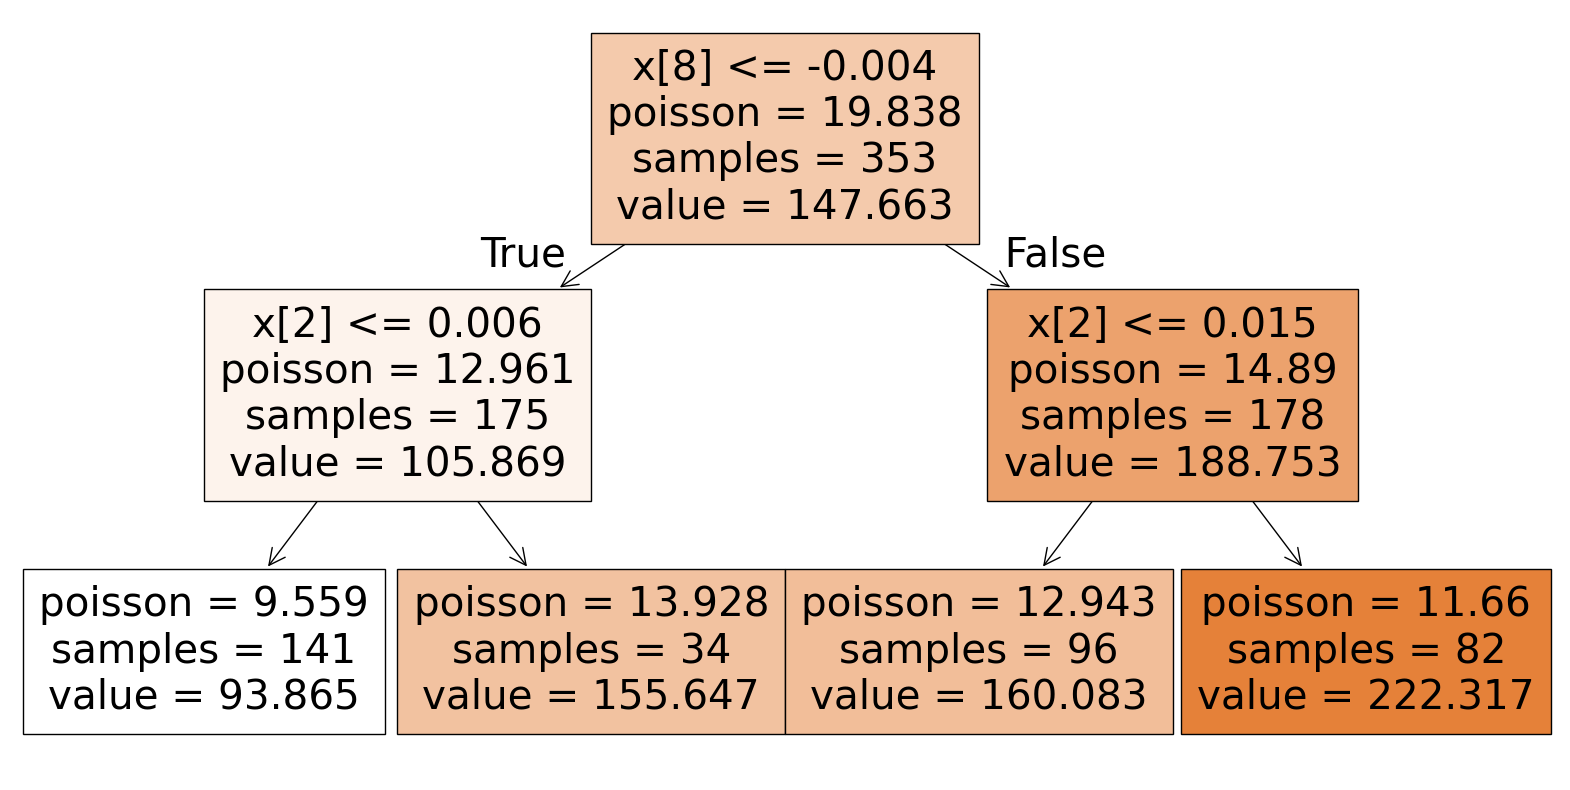

In [183]:
from sklearn import tree
dtr=DecisionTreeRegressor(criterion='poisson', max_depth= 2, splitter= 'best')
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
plt.subplots(figsize=(20,10))
tree.plot_tree(dtr,filled=True)

In [184]:
dtr.score(x_test,y_test)

0.41470957923703555